In [2]:
#Gerekli Kütüphanelerin Kurulumu ve Venv'in Hazırlanması

!pip install pandas
!pip install matplotlib
!pip install numpy
!pip install statsmodels 
!pip install openpyxl
!pip install scikit-learn
!pip install seaborn
!pip install prophet


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd

#Anomali için isolation forest
from sklearn.ensemble import IsolationForest

#Normalizasyon için scaler
from sklearn.preprocessing import MinMaxScaler
import numpy as np

#Plotlar için matplot ve seaborn
import matplotlib.pyplot as plt
import seaborn as sns

#Accuracy hesabı için (target valuelar yok ancak kendi bulduğum değerlerin benzerliğine bakmak için kullanıyorum.)
from prophet import Prophet
from sklearn.metrics import accuracy_score



C:\Users\izma\anaconda3\envs\innova-case\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [4]:
# Veriyi pandas yardımıyla yükleyelim.
df = pd.read_excel('case.xlsx')

#Tabloya göz atalım.
print("Shape:",df.shape)

print("İlk 20 satır:\n")
df.head(20)

#15. satırda NaN value görüldü. Preprocessing işleminde onları düzenlememiz gerekiyor.



Shape: (35429, 4)
İlk 20 satır:



,TIME_STAMP,SERVER_NAME,DOWNLOAD,UPLOAD
0,2024-03-05 18:25:00,10.0.901.xx Server 1,11927.017,424.700
1,2024-03-05 18:20:00,10.0.901.xx Server 1,19703.467,525.575
2,2024-03-05 18:15:00,10.0.901.xx Server 1,26349.663,631.144
3,2024-03-05 18:10:00,10.0.901.xx Server 1,26068.494,623.673
4,2024-03-05 18:05:00,10.0.901.xx Server 1,25814.357,620.701
5,2024-03-05 18:00:00,10.0.901.xx Server 1,25566.226,618.968
6,2024-03-05 17:55:00,10.0.901.xx Server 1,25483.363,612.865
7,2024-03-05 17:50:00,10.0.901.xx Server 1,25424.171,613.670
8,2024-03-05 17:45:00,10.0.901.xx Server 1,25128.195,608.531
9,2024-03-05 17:40:00,10.0.901.xx Server 1,24856.787,609.905


In [5]:
print("\nSon 20 satır:\n")
df.tail(20)



Son 20 satır:



,TIME_STAMP,SERVER_NAME,DOWNLOAD,UPLOAD
35409,2023-11-02 11:45:00,10.0.901.xx Server 1,15147.645,381.556
35410,2023-11-02 11:40:00,10.0.901.xx Server 1,15100.831,378.814
35411,2023-11-02 11:35:00,10.0.901.xx Server 1,15145.905,378.894
35412,2023-11-02 11:30:00,10.0.901.xx Server 1,14830.571,375.019
35413,2023-11-02 11:25:00,10.0.901.xx Server 1,14651.915,371.403
35414,2023-11-02 11:20:00,10.0.901.xx Server 1,14572.813,369.961
35415,2023-11-02 11:15:00,10.0.901.xx Server 1,15567.482,391.648
35416,2023-11-02 11:10:00,10.0.901.xx Server 1,15640.690,395.209
35417,2023-11-02 11:05:00,10.0.901.xx Server 1,15551.258,394.192
35418,2023-11-02 11:00:00,10.0.901.xx Server 1,15468.211,393.239


In [6]:
from sklearn.preprocessing import OneHotEncoder

#NaN değerleri ortadan kaldıralım.


df['DOWNLOAD'] = df['DOWNLOAD'].fillna(df['DOWNLOAD'].mean())
df['UPLOAD'] = df['UPLOAD'].fillna(df['UPLOAD'].mean())

#Saat, Dakika, Haftasonu ve Resmi Tatiller için yeni columnlar açalım
df['is_weekend'] = (df['TIME_STAMP'].dt.dayofweek >= 5).astype(int)  # 5 ve 6 günleri haftasonudur
df['hour'] = df['TIME_STAMP'].dt.hour
df['minute'] = df['TIME_STAMP'].dt.minute

print(df.head())

# One hot encoder ile kategorik olan saat ve dakika sütunlarını ordinal olmayan numerik bir hale getrelim

print(len(df['hour'].unique()))
print(pd.DataFrame(df['hour'].unique()).value_counts())

categorical_columns = ['hour','minute']

#Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(df[categorical_columns])

#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the one-hot encoded dataframe with the original dataframe
df_encoded = pd.concat([df, one_hot_df], axis=1)

# Drop the original categorical columns
df_encoded = df_encoded.drop(categorical_columns, axis=1)

# Display the resulting dataframe
print(f"Encoded data : \n{df_encoded}")




tr_holidays = [
    '2024-01-01',  # Yılbaşı
    '2024-04-23',  # Ulusal Egemenlik ve Çocuk Bayramı
    '2024-05-01',  # Emek ve Dayanışma Günü
    '2024-05-19',  # Atatürk'ü Anma, Gençlik ve Spor Bayramı
    '2024-08-30',  # Zafer Bayramı
    '2024-10-29',  # Cumhuriyet Bayramı
    '2024-07-15',  #15 Temmuz Demokrasi ve Milli Birlik Günü
    '2023-01-01',  # Yılbaşı
    '2023-04-23',  # Ulusal Egemenlik ve Çocuk Bayramı
    '2023-05-01',  # Emek ve Dayanışma Günü
    '2023-05-19',  # Atatürk'ü Anma, Gençlik ve Spor Bayramı
    '2023-08-30',  # Zafer Bayramı
    '2023-10-29',  # Cumhuriyet Bayramı
    '2023-07-15',  #15 Temmuz Demokrasi ve Milli Birlik Günü
]

tr_holidays = [pd.to_datetime(date) for date in tr_holidays]
df_encoded['is_holiday'] = df_encoded['TIME_STAMP'].dt.normalize().isin(tr_holidays).astype(int)

#Verimize tekrar göz atalım
#df['hour'].value_counts()


           TIME_STAMP           SERVER_NAME   DOWNLOAD   UPLOAD  is_weekend  \
0 2024-03-05 18:25:00  10.0.901.xx Server 1  11927.017  424.700           0   
1 2024-03-05 18:20:00  10.0.901.xx Server 1  19703.467  525.575           0   
2 2024-03-05 18:15:00  10.0.901.xx Server 1  26349.663  631.144           0   
3 2024-03-05 18:10:00  10.0.901.xx Server 1  26068.494  623.673           0   
4 2024-03-05 18:05:00  10.0.901.xx Server 1  25814.357  620.701           0   

   hour  minute  
0    18      25  
1    18      20  
2    18      15  
3    18      10  
4    18       5  
24
0 
0     1
1     1
22    1
21    1
20    1
19    1
18    1
17    1
16    1
15    1
14    1
13    1
12    1
11    1
10    1
9     1
8     1
7     1
6     1
5     1
4     1
3     1
2     1
23    1
Name: count, dtype: int64
Encoded Employee data : 
               TIME_STAMP           SERVER_NAME   DOWNLOAD   UPLOAD  \
0     2024-03-05 18:25:00  10.0.901.xx Server 1  11927.017  424.700   
1     2024-03-05 18:20:00 

is_weekend
0    25170
1    10259
Name: count, dtype: int64


<Axes: ylabel='is_weekend'>

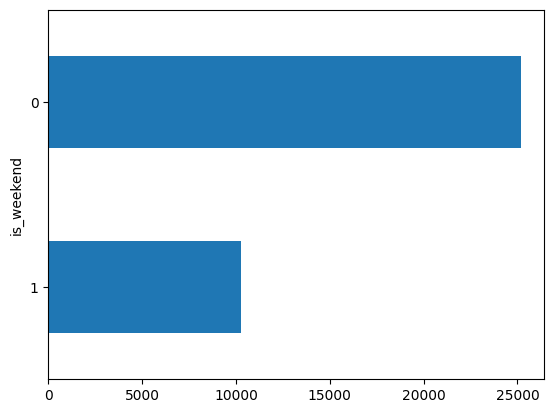

In [7]:
print(df_encoded.is_weekend.value_counts())
df_encoded.is_weekend.value_counts().sort_values().plot(kind = 'barh')

is_holiday
0    35144
1      285
Name: count, dtype: int64


<Axes: ylabel='is_holiday'>

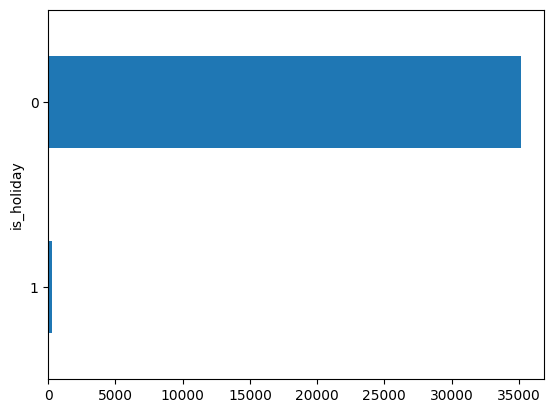

In [8]:

print(df_encoded.is_holiday.value_counts())
df_encoded.is_holiday.value_counts().sort_values().plot(kind = 'barh')


<Axes: xlabel='DOWNLOAD', ylabel='UPLOAD'>

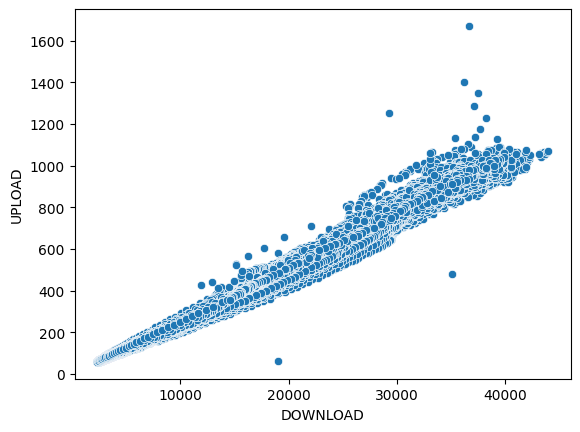

In [9]:
#Download Upload Scatter plotu
sns.scatterplot(data=df_encoded, x="DOWNLOAD", y="UPLOAD")


,TIME_STAMP,SERVER_NAME,DOWNLOAD,UPLOAD,is_weekend,hour_0,hour_1,hour_2,hour_3,hour_4,...,minute_15,minute_20,minute_25,minute_30,minute_35,minute_40,minute_45,minute_50,minute_55,is_holiday
0,2024-03-05 18:25:00,10.0.901.xx Server 1,0.230585,0.227461,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,2024-03-05 18:20:00,10.0.901.xx Server 1,0.417543,0.289990,0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,2024-03-05 18:15:00,10.0.901.xx Server 1,0.577327,0.355429,0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,2024-03-05 18:10:00,10.0.901.xx Server 1,0.570568,0.350798,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,2024-03-05 18:05:00,10.0.901.xx Server 1,0.564458,0.348956,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


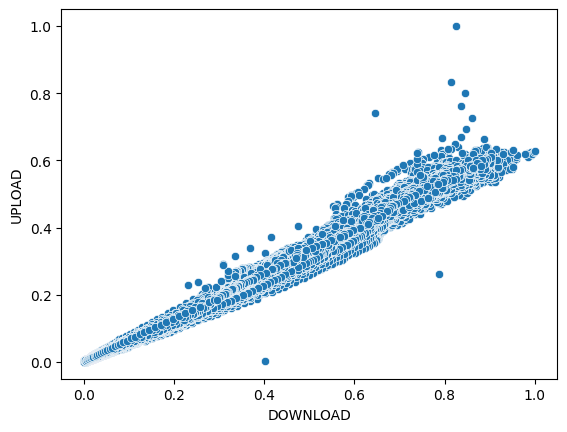

In [10]:
#Download ve Upload değerlerini normalize edelim.
scaler = MinMaxScaler()
df_normalised = df_encoded.copy()
df_normalised[['UPLOAD', 'DOWNLOAD']] = scaler.fit_transform(df_normalised[['UPLOAD', 'DOWNLOAD']])

sns.scatterplot(data=df_normalised, x="DOWNLOAD", y="UPLOAD")
df_normalised.head()

basic_anomaly
 1    33657
-1     1772
Name: count, dtype: int64


<Axes: xlabel='basic_anomaly'>

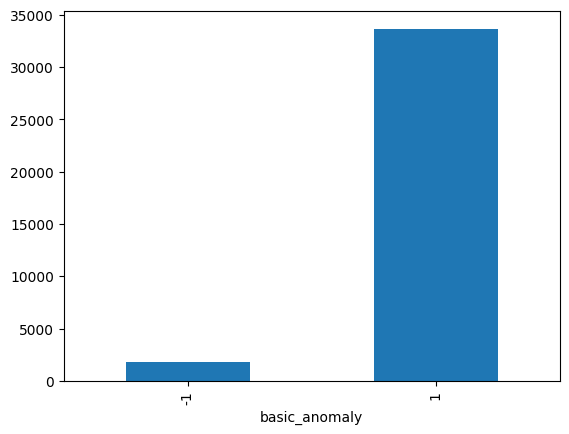

In [11]:
# Yalnızca download ve upload değerleri ile yapılan eğitimi görelim.
only_og = df_normalised[['DOWNLOAD', 'UPLOAD']]

#Contamination değerini 0.05 seçip plotta gözlem yapalım.
model = IsolationForest(contamination=0.05, random_state=42)  
model.fit(only_og)

# Anomalileri predict edip basic_anomaly isimli yeni bir columna yazalım.
df_normalised['basic_anomaly'] = model.predict(only_og)

# Anomaliler -1 olarak işaretlenir, normal veriler ise 1 olarak işaretlenir
basic_anomaly = df_normalised[df_normalised['basic_anomaly'] == -1]
print(df_normalised['basic_anomaly'].value_counts())
df_normalised['basic_anomaly'].value_counts().sort_values().plot(kind='bar')



TIME_STAMP           SERVER_NAME           DOWNLOAD  UPLOAD    is_weekend  hour_0  hour_1  hour_2  hour_3  hour_4  hour_5  hour_6  hour_7  hour_8  hour_9  hour_10  hour_11  hour_12  hour_13  hour_14  hour_15  hour_16  hour_17  hour_18  hour_19  hour_20  hour_21  hour_22  hour_23  minute_0  minute_5  minute_10  minute_15  minute_20  minute_25  minute_30  minute_35  minute_40  minute_45  minute_50  minute_55  is_holiday  basic_anomaly
2023-11-03 04:30:00  10.0.901.xx Server 1  0.005962  0.004645  0           0.0     0.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0     0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0       0.0       0.0        0.0        0.0        0.0        1.0        0.0        0.0        0.0        0.0        0.0        0           -1               1
2024-01-31 22:50:00  10.0.901.xx Server 1  0.836960  0.547677  0           0.0     0.0     0.0     0.0     0.0     0.0   

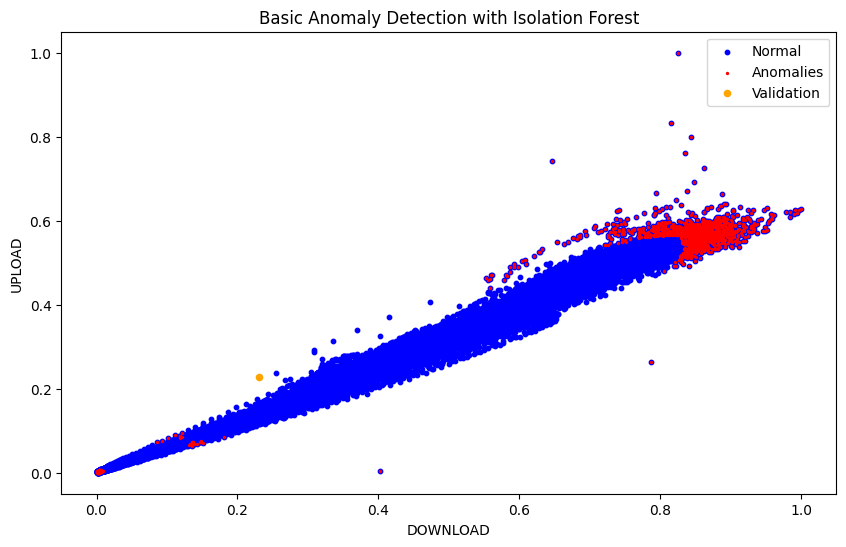

In [12]:
plt.figure(figsize=(10, 6))
print(basic_anomaly.value_counts())

# Scatter plot olarak normal verileri ve anormal verileri gözlemleyelim. (Normaller mavi, anomaliler kırmızı)
plt.scatter(df_normalised['DOWNLOAD'], df_normalised['UPLOAD'], c='blue', label='Normal', s=10)

# Anomalileri kırmızı ile göster
plt.scatter(basic_anomaly['DOWNLOAD'], basic_anomaly['UPLOAD'], c='red', label='Anomalies', s=2)
sample=df_normalised[(df_normalised['TIME_STAMP'] == "2024-03-05 18:25:00")]
plt.scatter(sample['DOWNLOAD'], sample['UPLOAD'], c= 'orange', label = 'Validation', s=20)


plt.xlabel('DOWNLOAD')
plt.ylabel('UPLOAD')
plt.legend()
plt.title('Basic Anomaly Detection with Isolation Forest')
plt.show()

basic_anomaly
 1    34720
-1      709
Name: count, dtype: int64


<Axes: xlabel='basic_anomaly'>

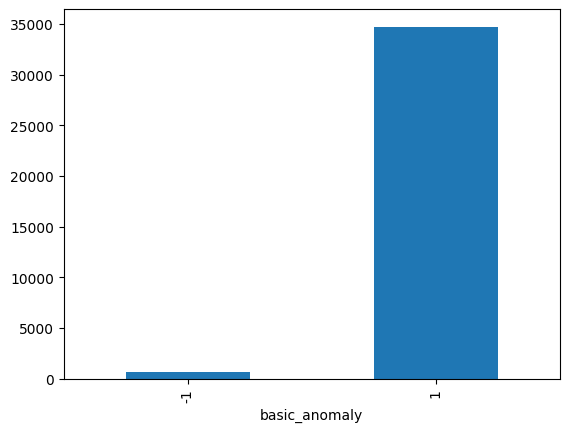

In [13]:
# Yalnızca download ve upload değerleri kullanarak modeli eğitelim ve gözlemleyelim.
only_og = df_normalised[['DOWNLOAD', 'UPLOAD']]

model = IsolationForest(contamination=0.02, random_state=42)  
model.fit(only_og)

# Anomalileri tahmin edin
df_normalised['basic_anomaly'] = model.predict(only_og)

# Anomaliler -1 olarak işaretlenir, normal veriler ise 1 olarak işaretlenir
basic_anomaly = df_normalised[df_normalised['basic_anomaly'] == -1]
print(df_normalised['basic_anomaly'].value_counts())
df_normalised['basic_anomaly'].value_counts().sort_values().plot(kind='bar')



TIME_STAMP           SERVER_NAME           DOWNLOAD  UPLOAD    is_weekend  hour_0  hour_1  hour_2  hour_3  hour_4  hour_5  hour_6  hour_7  hour_8  hour_9  hour_10  hour_11  hour_12  hour_13  hour_14  hour_15  hour_16  hour_17  hour_18  hour_19  hour_20  hour_21  hour_22  hour_23  minute_0  minute_5  minute_10  minute_15  minute_20  minute_25  minute_30  minute_35  minute_40  minute_45  minute_50  minute_55  is_holiday  basic_anomaly
2023-11-03 04:45:00  10.0.901.xx Server 1  0.001927  0.003412  0           0.0     0.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0     0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0       0.0       0.0        0.0        0.0        0.0        0.0        0.0        0.0        1.0        0.0        0.0        0           -1               1
2024-02-04 22:25:00  10.0.901.xx Server 1  0.897266  0.558041  1           0.0     0.0     0.0     0.0     0.0     0.0   

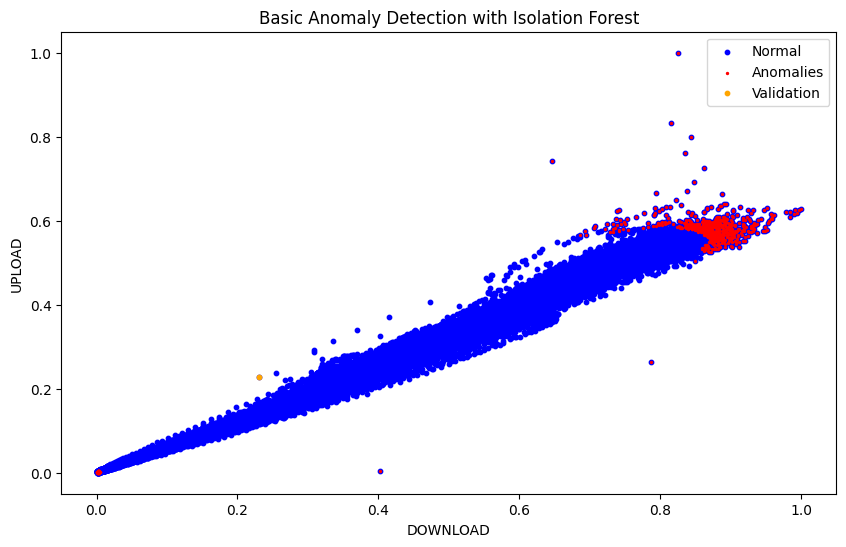

In [14]:
plt.figure(figsize=(10, 6))
print(basic_anomaly.value_counts())

# Normal verileri scatter plot ile göster
plt.scatter(df_normalised['DOWNLOAD'], df_normalised['UPLOAD'], c='blue', label='Normal', s=10)

# Anomalileri kırmızı ile göster
plt.scatter(basic_anomaly['DOWNLOAD'], basic_anomaly['UPLOAD'], c='red', label='Anomalies', s=2)
plt.scatter(sample['DOWNLOAD'], sample['UPLOAD'], c= 'orange', label = 'Validation', s=10)


plt.xlabel('DOWNLOAD')
plt.ylabel('UPLOAD')
plt.legend()
plt.title('Basic Anomaly Detection with Isolation Forest')
plt.show()

In [15]:
training_df = df_normalised.copy()
training_df= training_df.drop(['SERVER_NAME', 'TIME_STAMP'], axis=1)
training_df.columns


Index(['DOWNLOAD', 'UPLOAD', 'is_weekend', 'hour_0', 'hour_1', 'hour_2',
       'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9',
       'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15',
       'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21',
       'hour_22', 'hour_23', 'minute_0', 'minute_5', 'minute_10', 'minute_15',
       'minute_20', 'minute_25', 'minute_30', 'minute_35', 'minute_40',
       'minute_45', 'minute_50', 'minute_55', 'is_holiday', 'basic_anomaly'],
      dtype='object')

In [16]:
# Modeli oluşturun ve eğitin
model = IsolationForest(contamination=0.05, random_state=42)
model.fit(training_df)
    


IsolationForest(contamination=0.05, random_state=42)

anomaly
 1    33658
-1     1771
Name: count, dtype: int64


<Axes: xlabel='anomaly'>

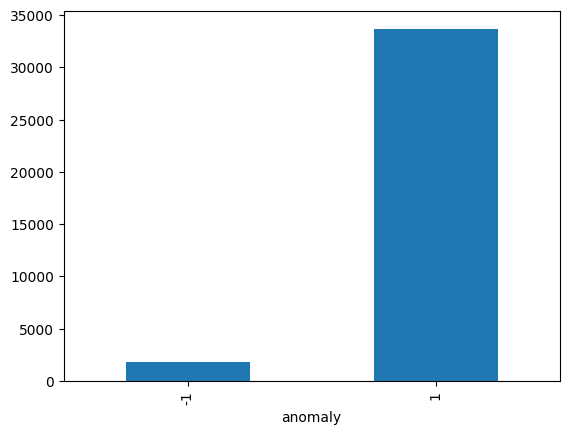

In [17]:
# Yeni featurelarla anomali analizi

df_normalised['anomaly'] = model.predict(training_df)

# Anomaliler -1, normal veriler ise 1 olsun
anomalies = df_normalised[df_normalised['anomaly'] == -1]
print(df_normalised['anomaly'].value_counts())
df_normalised['anomaly'].value_counts().sort_values().plot(kind='bar')

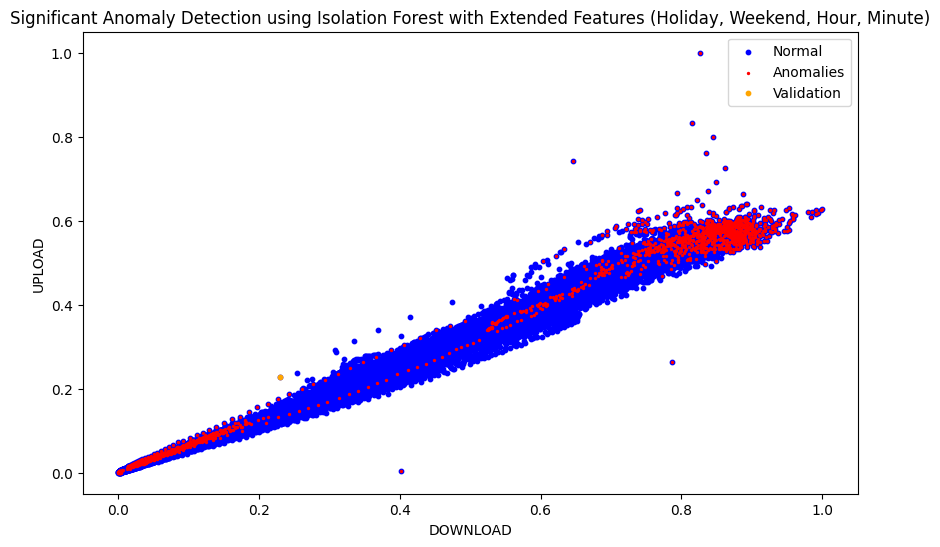

In [18]:
plt.figure(figsize=(10, 6))

# Normal verileri scatter plot ile göster
plt.scatter(df_normalised['DOWNLOAD'], df_normalised['UPLOAD'], c='blue', label='Normal', s=10)

# Anomalileri kırmızı ile göster
plt.scatter(anomalies['DOWNLOAD'], anomalies['UPLOAD'], c='red', label='Anomalies', s=2)
plt.scatter(sample['DOWNLOAD'], sample['UPLOAD'], c= 'orange', label = 'Validation', s=10)


plt.xlabel('DOWNLOAD')
plt.ylabel('UPLOAD')
plt.legend()
plt.title('Significant Anomaly Detection using Isolation Forest with Extended Features (Holiday, Weekend, Hour, Minute)')
plt.show()

In [19]:
model = IsolationForest(contamination=0.02, random_state=42)  # 0.02 cont deniyorum.Çünkü plottaki pattern doğru gelmedi.
model.fit(training_df)

IsolationForest(contamination=0.02, random_state=42)

anomaly
 1    34721
-1      708
Name: count, dtype: int64


<Axes: xlabel='anomaly'>

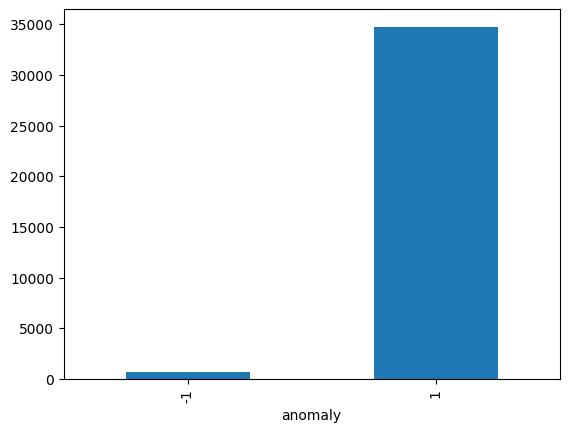

In [20]:
# Yeni featurelarla anomali analizi

df_normalised['anomaly'] = model.predict(training_df)

# Anomaliler -1, normal veriler ise 1
anomalies = df_normalised[df_normalised['anomaly'] == -1]
print(df_normalised['anomaly'].value_counts())
df_normalised['anomaly'].value_counts().sort_values().plot(kind='bar')

TIME_STAMP           SERVER_NAME           DOWNLOAD  UPLOAD    is_weekend  hour_0  hour_1  hour_2  hour_3  hour_4  hour_5  hour_6  hour_7  hour_8  hour_9  hour_10  hour_11  hour_12  hour_13  hour_14  hour_15  hour_16  hour_17  hour_18  hour_19  hour_20  hour_21  hour_22  hour_23  minute_0  minute_5  minute_10  minute_15  minute_20  minute_25  minute_30  minute_35  minute_40  minute_45  minute_50  minute_55  is_holiday  basic_anomaly  anomaly
2023-11-03 04:45:00  10.0.901.xx Server 1  0.001927  0.003412  0           0.0     0.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0     0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0       0.0       0.0        0.0        0.0        0.0        0.0        0.0        0.0        1.0        0.0        0.0        0           -1             -1         1
2024-01-28 23:45:00  10.0.901.xx Server 1  0.900283  0.565088  1           0.0     0.0     0.0     0.0 

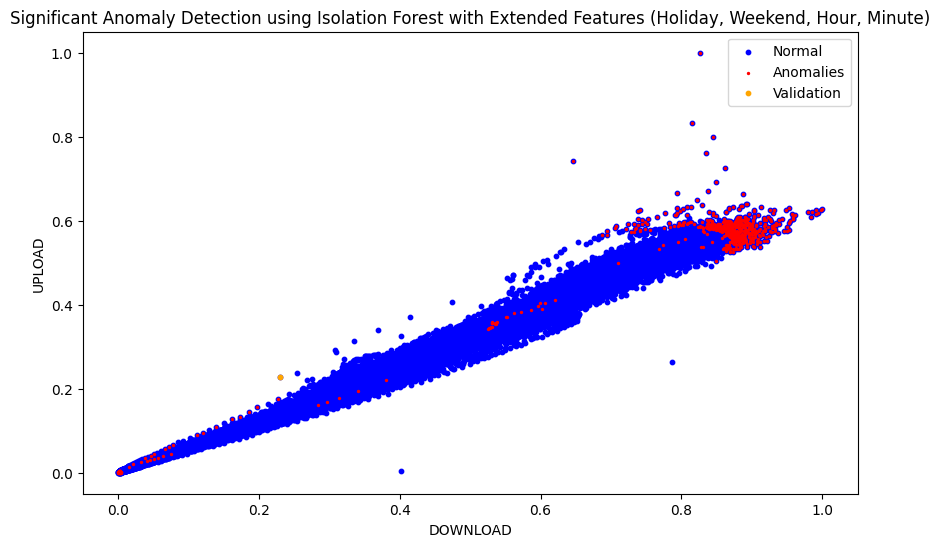

,TIME_STAMP,SERVER_NAME,DOWNLOAD,UPLOAD,is_weekend,hour_0,hour_1,hour_2,hour_3,hour_4,...,minute_20,minute_25,minute_30,minute_35,minute_40,minute_45,minute_50,minute_55,is_holiday,basic_anomaly
0,2024-03-05 18:25:00,10.0.901.xx Server 1,0.230585,0.227461,0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1


In [21]:
plt.figure(figsize=(10, 6))
print(anomalies.value_counts())
# Normal verileri scatter plot ile göster
plt.scatter(df_normalised['DOWNLOAD'], df_normalised['UPLOAD'], c='blue', label='Normal', s=10)

# Anomalileri kırmızı ile göster
plt.scatter(anomalies['DOWNLOAD'], anomalies['UPLOAD'], c='red', label='Anomalies', s=2)

plt.scatter(sample['DOWNLOAD'], sample['UPLOAD'], c= 'orange', label = 'Validation', s=10)


plt.xlabel('DOWNLOAD')
plt.ylabel('UPLOAD')
plt.legend()
plt.title('Significant Anomaly Detection using Isolation Forest with Extended Features (Holiday, Weekend, Hour, Minute)')
plt.show()

sample

In [22]:
sample
#df_normalised[df_normalised['TIME_STAMP'] == "2024-03-05 18:25:00"]

,TIME_STAMP,SERVER_NAME,DOWNLOAD,UPLOAD,is_weekend,hour_0,hour_1,hour_2,hour_3,hour_4,...,minute_20,minute_25,minute_30,minute_35,minute_40,minute_45,minute_50,minute_55,is_holiday,basic_anomaly
0,2024-03-05 18:25:00,10.0.901.xx Server 1,0.230585,0.227461,0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1


In [23]:
accuracy = accuracy_score(df_normalised['anomaly'], df_normalised['basic_anomaly'])
print(accuracy)

temp_df=df_normalised[(df_normalised['anomaly'] != df_normalised['basic_anomaly'])]
temp_df[['TIME_STAMP','SERVER_NAME', 'DOWNLOAD', 'UPLOAD', 'basic_anomaly', 'anomaly']]

0.9964153659431539


,TIME_STAMP,SERVER_NAME,DOWNLOAD,UPLOAD,basic_anomaly,anomaly
151,2024-03-05 05:40:00,10.0.901.xx Server 1,0.401887,0.003981,-1,1
156,2024-03-05 05:15:00,10.0.901.xx Server 1,0.002047,0.000414,-1,1
158,2024-03-05 05:05:00,10.0.901.xx Server 1,0.002003,0.000835,-1,1
159,2024-03-05 05:00:00,10.0.901.xx Server 1,0.001531,0.000647,-1,1
218,2024-03-05 00:00:00,10.0.901.xx Server 1,0.786960,0.263067,-1,1
...,...,...,...,...,...,...
34061,2023-11-07 05:15:00,10.0.901.xx Server 1,0.002923,0.002956,-1,1
34138,2023-11-06 22:45:00,10.0.901.xx Server 1,0.857111,0.577669,-1,1
35201,2023-11-03 05:15:00,10.0.901.xx Server 1,0.001240,0.002369,-1,1
35203,2023-11-03 05:05:00,10.0.901.xx Server 1,0.001140,0.001911,-1,1


In [24]:
 #Sadece anomali verileri gösterelim.
plt.figure(figsize=(10, 6))

anomalies.head()

,TIME_STAMP,SERVER_NAME,DOWNLOAD,UPLOAD,is_weekend,hour_0,hour_1,hour_2,hour_3,hour_4,...,minute_25,minute_30,minute_35,minute_40,minute_45,minute_50,minute_55,is_holiday,basic_anomaly,anomaly
154,2024-03-05 05:25:00,10.0.901.xx Server 1,0.003624,0.001723,0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,-1,-1
155,2024-03-05 05:20:00,10.0.901.xx Server 1,0.002292,0.000924,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,-1,-1
157,2024-03-05 05:10:00,10.0.901.xx Server 1,0.001954,0.000271,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,-1,-1
160,2024-03-05 04:55:00,10.0.901.xx Server 1,0.000532,0.000000,0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,-1,-1
161,2024-03-05 04:50:00,10.0.901.xx Server 1,0.000861,0.000683,0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,-1,-1


<Figure size 1000x600 with 0 Axes>

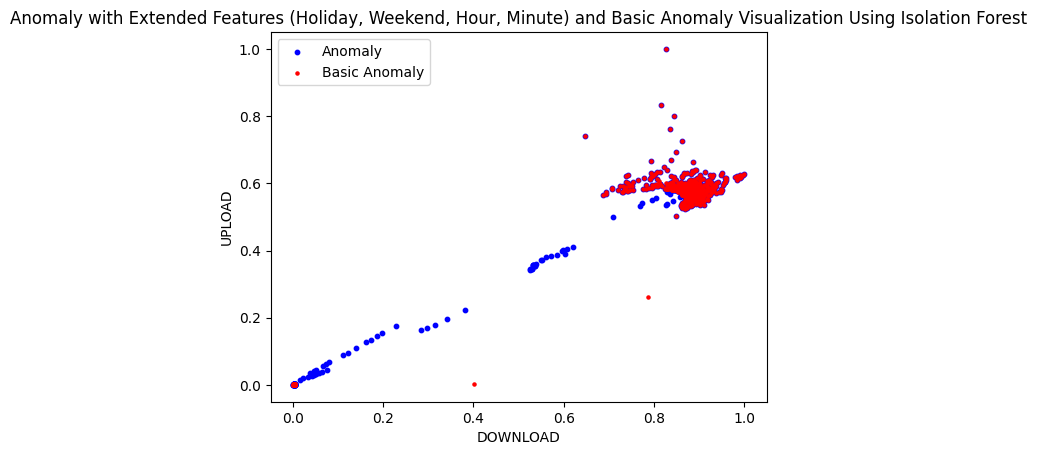

In [25]:
plt.scatter(anomalies['DOWNLOAD'], anomalies['UPLOAD'], c='blue', label='Anomaly', s=10)
plt.scatter(basic_anomaly['DOWNLOAD'], basic_anomaly['UPLOAD'], c ='red', label = 'Basic Anomaly', s=5)
plt.xlabel('DOWNLOAD')
plt.ylabel('UPLOAD')
plt.legend()
plt.title('Anomaly with Extended Features (Holiday, Weekend, Hour, Minute) and Basic Anomaly Visualization Using Isolation Forest')
plt.show()

               TIME_STAMP           SERVER_NAME   DOWNLOAD   UPLOAD  \
0     2024-03-05 18:25:00  10.0.901.xx Server 1  11927.017  424.700   
1     2024-03-05 18:20:00  10.0.901.xx Server 1  19703.467  525.575   
2     2024-03-05 18:15:00  10.0.901.xx Server 1  26349.663  631.144   
3     2024-03-05 18:10:00  10.0.901.xx Server 1  26068.494  623.673   
4     2024-03-05 18:05:00  10.0.901.xx Server 1  25814.357  620.701   
...                   ...                   ...        ...      ...   
35424 2023-11-02 10:30:00  10.0.901.xx Server 1  14604.990  364.365   
35425 2023-11-02 10:25:00  10.0.901.xx Server 1  14461.797  358.717   
35426 2023-11-02 10:20:00  10.0.901.xx Server 1  14381.373  357.816   
35427 2023-11-02 10:15:00  10.0.901.xx Server 1  14336.298  355.811   
35428 2023-11-02 10:10:00  10.0.901.xx Server 1  14611.335  357.395   

       is_weekend  hour  minute  
0               0    18      25  
1               0    18      20  
2               0    18      15  
3          

C:\Users\izma\AppData\Local\Temp\ipykernel_13808\154493442.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['traffic_volume'] = df_filtered['UPLOAD'] + df_filtered['DOWNLOAD']


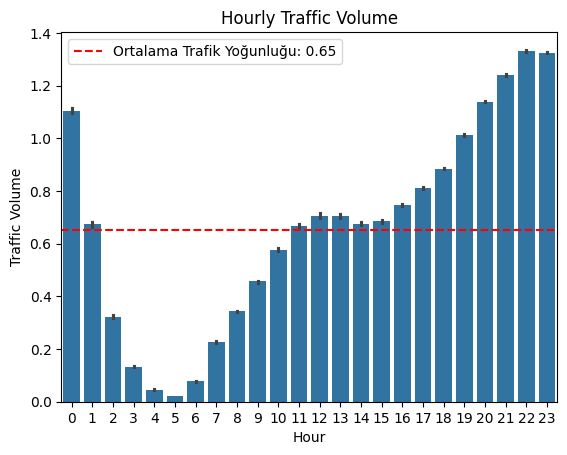

In [28]:
#Saatler ve Trafik Yoğunluğu

#Anomalileri çıkarıp kalan veride ortalama trafiği bulalım

scaler = MinMaxScaler()
df_hourly = df.copy()
print(df_hourly)

df_hourly['anomaly'] = df_normalised['anomaly']
print(df_normalised['basic_anomaly'])
df_hourly['basic_anomaly'] = df_normalised['basic_anomaly']
print(df_hourly)

df_hourly[['UPLOAD', 'DOWNLOAD']] = scaler.fit_transform(df_hourly[['UPLOAD', 'DOWNLOAD']])
df_hourly['traffic_volume']= df_hourly['UPLOAD'] + df_hourly['DOWNLOAD']


df_filtered = df_hourly[df_hourly['anomaly'] == 1]

# Trafik yoğunluğu feature'ı oluşturalım.
df_filtered['traffic_volume'] = df_filtered['UPLOAD'] + df_filtered['DOWNLOAD']
df_filtered.head()


sns.barplot(df_filtered, x="hour", y="traffic_volume")

#Ortalam trafik yoğunluğu çizgsii
plt.axhline(ort_traffic_volume, color='red', linestyle='--', label=f'Ortalama Trafik Yoğunluğu: {ort_traffic_volume:.2f}')

plt.xlabel('Hour')
plt.ylabel('Traffic Volume')
plt.title('Hourly Traffic Volume')
plt.legend()
plt.show()


In [27]:
#Ortalama trafik yoğunluğu
ort_traffic_volume = float(df_filtered['traffic_volume'].mean())

print("Ortalama Trafik Yoğunluğu:",ort_traffic_volume)
df_filtered['traffic_volume']


Ortalama Trafik Yoğunluğu: 0.652313299670166


0        0.458047
1        0.707533
2        0.932757
3        0.921366
4        0.913414
           ...   
35424    0.485029
35425    0.478086
35426    0.475594
35427    0.473267
35428    0.480861
Name: traffic_volume, Length: 34721, dtype: float64

In [29]:
training_df.columns

Index(['DOWNLOAD', 'UPLOAD', 'is_weekend', 'hour_0', 'hour_1', 'hour_2',
       'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9',
       'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15',
       'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21',
       'hour_22', 'hour_23', 'minute_0', 'minute_5', 'minute_10', 'minute_15',
       'minute_20', 'minute_25', 'minute_30', 'minute_35', 'minute_40',
       'minute_45', 'minute_50', 'minute_55', 'is_holiday', 'basic_anomaly'],
      dtype='object')

In [30]:
highest_traffic=df_filtered.groupby('hour')['traffic_volume'].mean().sort_values(ascending=False).reset_index()
highest_traffic

,hour,traffic_volume
0,22,1.332758
1,23,1.325489
2,21,1.239638
3,20,1.139497
4,0,1.105381
5,19,1.013537
6,18,0.885327
7,17,0.810876
8,16,0.746437
9,12,0.706610


In [31]:
highest_traffic.head()

,hour,traffic_volume
0,22,1.332758
1,23,1.325489
2,21,1.239638
3,20,1.139497
4,0,1.105381


FORECAST

SORU 2 PROPHET FORECASTING

In [32]:
df_hourly
df_traffic=df_hourly.copy()
df_traffic['traffic_volume'] = df_traffic['DOWNLOAD'] + df_traffic['UPLOAD']
df_traffic


,TIME_STAMP,SERVER_NAME,DOWNLOAD,UPLOAD,is_weekend,hour,minute,anomaly,basic_anomaly,traffic_volume
0,2024-03-05 18:25:00,10.0.901.xx Server 1,0.230585,0.227461,0,18,25,1,1,0.458047
1,2024-03-05 18:20:00,10.0.901.xx Server 1,0.417543,0.289990,0,18,20,1,1,0.707533
2,2024-03-05 18:15:00,10.0.901.xx Server 1,0.577327,0.355429,0,18,15,1,1,0.932757
3,2024-03-05 18:10:00,10.0.901.xx Server 1,0.570568,0.350798,0,18,10,1,1,0.921366
4,2024-03-05 18:05:00,10.0.901.xx Server 1,0.564458,0.348956,0,18,5,1,1,0.913414
...,...,...,...,...,...,...,...,...,...,...
35424,2023-11-02 10:30:00,10.0.901.xx Server 1,0.294968,0.190062,0,10,30,1,1,0.485029
35425,2023-11-02 10:25:00,10.0.901.xx Server 1,0.291525,0.186561,0,10,25,1,1,0.478086
35426,2023-11-02 10:20:00,10.0.901.xx Server 1,0.289592,0.186002,0,10,20,1,1,0.475594
35427,2023-11-02 10:15:00,10.0.901.xx Server 1,0.288508,0.184759,0,10,15,1,1,0.473267


In [33]:


model_download = Prophet()
model_download.add_seasonality(name='hourly', period=24, fourier_order=8)
df_download = df_normalised[['TIME_STAMP', 'DOWNLOAD']].rename(columns={'TIME_STAMP': 'ds', 'DOWNLOAD': 'y'})
model_download.fit(df_download)

model_upload = Prophet()
model_upload.add_seasonality(name='hourly', period=24, fourier_order=8)
df_upload = df_normalised[['TIME_STAMP', 'UPLOAD']].rename(columns={'TIME_STAMP': 'ds', 'UPLOAD': 'y'})
model_upload.fit(df_upload)

model_anomaly = Prophet()
model_anomaly.add_seasonality(name='hourly', period=24, fourier_order=8)
df_anomaly = df_normalised[['TIME_STAMP', 'anomaly']].rename(columns={'TIME_STAMP': 'ds', 'anomaly': 'y'})
model_anomaly.fit(df_anomaly)

model_traffic = Prophet()
model_traffic.add_seasonality(name='hourly', period=24, fourier_order=8)
df_traffic = df_traffic[['TIME_STAMP', 'traffic_volume']].rename(columns={'TIME_STAMP': 'ds', 'traffic_volume': 'y'})
model_traffic.fit(df_traffic)


# Tahminler için tarih aralığı
future_download = model_download.make_future_dataframe(periods=72, freq='h')
forecast_download = model_download.predict(future_download)

future_upload = model_upload.make_future_dataframe(periods=72, freq='h')
forecast_upload = model_upload.predict(future_upload)

future_anomaly = model_anomaly.make_future_dataframe(periods=24*1000, freq='h')
forecast_anomaly = model_anomaly.predict(future_anomaly)

future_traffic = model_traffic.make_future_dataframe(periods=24*1000, freq='h')
forecast_traffic = model_traffic.predict(future_traffic)

# Tahmin sonuçlarını incele


14:53:00 - cmdstanpy - INFO - Chain [1] start processing
14:53:17 - cmdstanpy - INFO - Chain [1] done processing
14:53:21 - cmdstanpy - INFO - Chain [1] start processing
14:53:40 - cmdstanpy - INFO - Chain [1] done processing
14:53:44 - cmdstanpy - INFO - Chain [1] start processing
14:53:52 - cmdstanpy - INFO - Chain [1] done processing
14:53:56 - cmdstanpy - INFO - Chain [1] start processing
14:54:14 - cmdstanpy - INFO - Chain [1] done processing


In [34]:
forecast_download[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
forecast_download

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,hourly,hourly_lower,hourly_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-11-02 10:10:00,0.392892,0.249471,0.384537,0.392892,0.392892,-0.074940,-0.074940,-0.074940,-0.061616,...,0.005199,0.005199,0.005199,-0.018523,-0.018523,-0.018523,0.0,0.0,0.0,0.317952
1,2023-11-02 10:15:00,0.392901,0.259799,0.391264,0.392901,0.392901,-0.068659,-0.068659,-0.068659,-0.055312,...,0.005168,0.005168,0.005168,-0.018515,-0.018515,-0.018515,0.0,0.0,0.0,0.324243
2,2023-11-02 10:20:00,0.392911,0.267697,0.399452,0.392911,0.392911,-0.062515,-0.062515,-0.062515,-0.049144,...,0.005137,0.005137,0.005137,-0.018507,-0.018507,-0.018507,0.0,0.0,0.0,0.330396
3,2023-11-02 10:25:00,0.392920,0.266484,0.397308,0.392920,0.392920,-0.056524,-0.056524,-0.056524,-0.043129,...,0.005105,0.005105,0.005105,-0.018500,-0.018500,-0.018500,0.0,0.0,0.0,0.336396
4,2023-11-02 10:30:00,0.392929,0.280567,0.407141,0.392929,0.392929,-0.050700,-0.050700,-0.050700,-0.037282,...,0.005074,0.005074,0.005074,-0.018492,-0.018492,-0.018492,0.0,0.0,0.0,0.342229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35496,2024-03-08 14:25:00,0.414622,0.324177,0.457740,0.412671,0.416599,-0.023181,-0.023181,-0.023181,0.001695,...,-0.003606,-0.003606,-0.003606,-0.021271,-0.021271,-0.021271,0.0,0.0,0.0,0.391441
35497,2024-03-08 15:25:00,0.414640,0.339561,0.472970,0.412598,0.416665,-0.012482,-0.012482,-0.012482,0.011898,...,-0.003641,-0.003641,-0.003641,-0.020739,-0.020739,-0.020739,0.0,0.0,0.0,0.402157
35498,2024-03-08 16:25:00,0.414657,0.367515,0.502967,0.412526,0.416743,0.023572,0.023572,0.023572,0.047320,...,-0.003677,-0.003677,-0.003677,-0.020070,-0.020070,-0.020070,0.0,0.0,0.0,0.438229
35499,2024-03-08 17:25:00,0.414674,0.418558,0.552105,0.412499,0.416812,0.069037,0.069037,0.069037,0.092008,...,-0.003712,-0.003712,-0.003712,-0.019259,-0.019259,-0.019259,0.0,0.0,0.0,0.483711


C:\Users\izma\anaconda3\envs\innova-case\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\izma\anaconda3\envs\innova-case\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


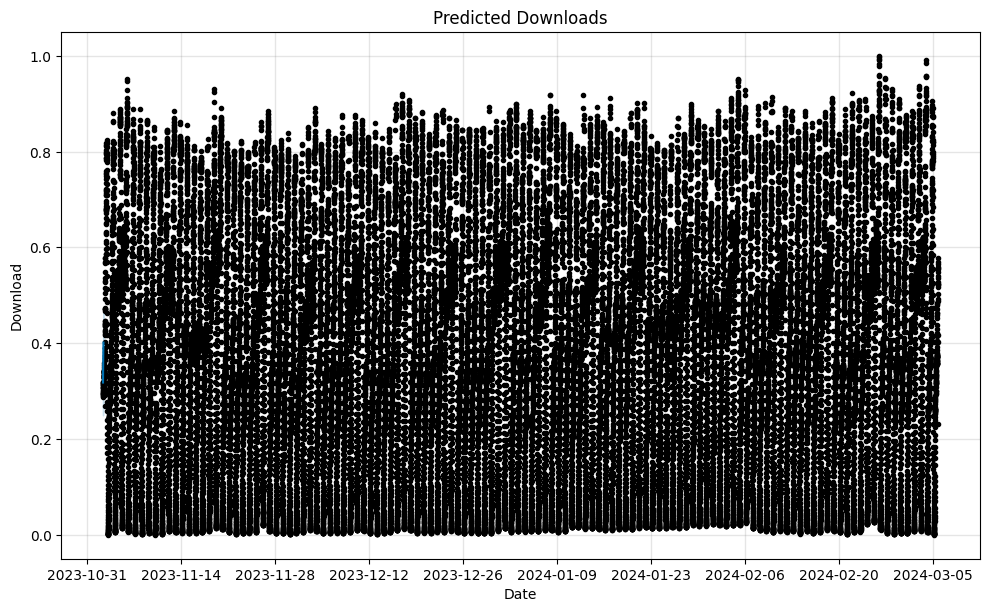

C:\Users\izma\anaconda3\envs\innova-case\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\izma\anaconda3\envs\innova-case\Lib\site-packages\prophet\plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
C:\Users\izma\anaconda3\envs\innova-case\Lib\site-packages\prophet\plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects inste

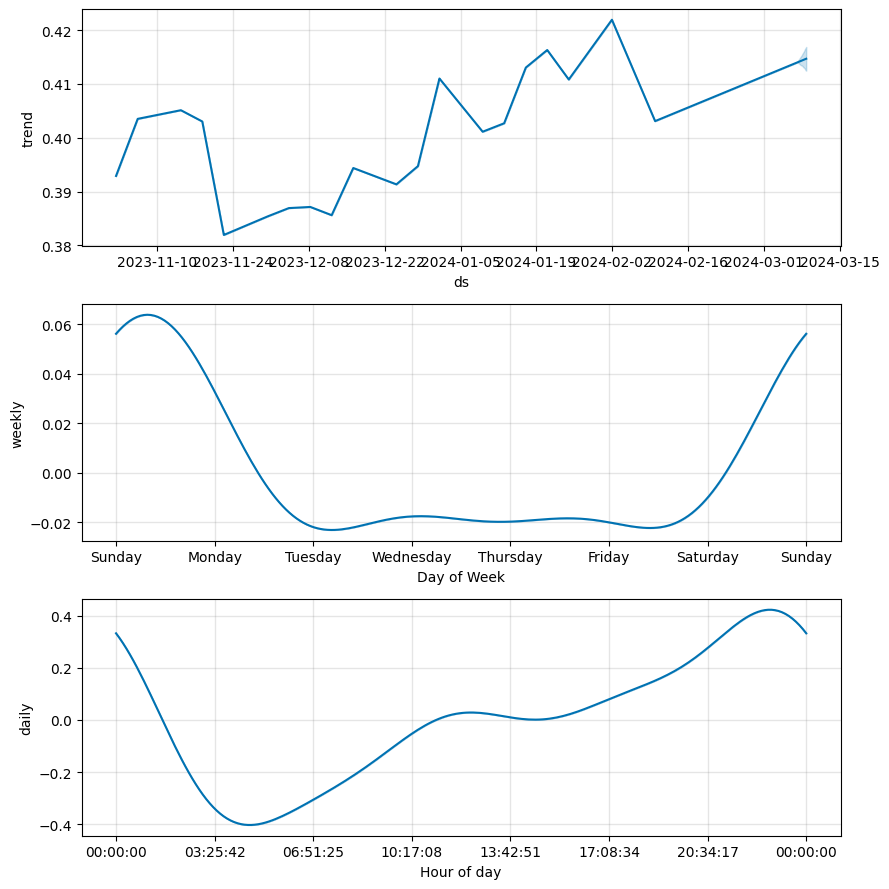

In [35]:

fig = model_download.plot(forecast_download.head(20))
plt.title('Predicted Downloads')
plt.xlabel('Date')
plt.ylabel('Download')
plt.show()



# Bileşenleri görselleştirin
fig2 = model_download.plot_components(forecast_download.drop(['hourly'], axis=1))

plt.show()

In [36]:
forecast_upload[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2023-11-02 10:10:00,0.191870,0.150772,0.233791
1,2023-11-02 10:15:00,0.196326,0.158310,0.236458
2,2023-11-02 10:20:00,0.200711,0.161632,0.243171
3,2023-11-02 10:25:00,0.205014,0.162752,0.246503
4,2023-11-02 10:30:00,0.209223,0.169848,0.251505


C:\Users\izma\anaconda3\envs\innova-case\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\izma\anaconda3\envs\innova-case\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


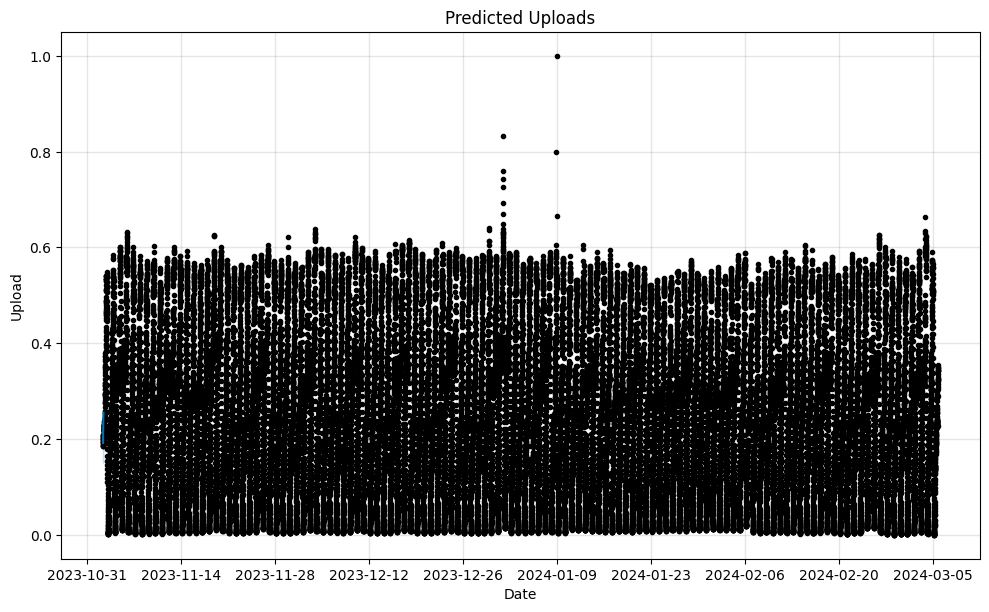

C:\Users\izma\anaconda3\envs\innova-case\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\izma\anaconda3\envs\innova-case\Lib\site-packages\prophet\plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
C:\Users\izma\anaconda3\envs\innova-case\Lib\site-packages\prophet\plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects inste

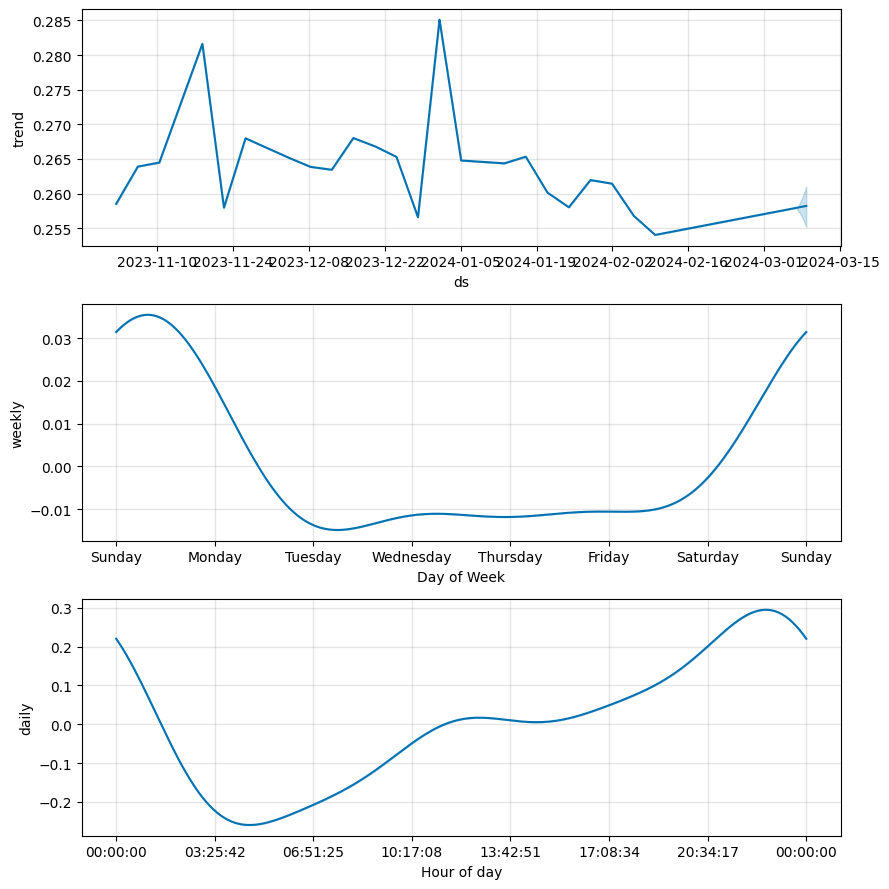

In [37]:

fig = model_upload.plot(forecast_upload.head(20))
plt.title('Predicted Uploads')
plt.xlabel('Date')
plt.ylabel('Upload')
plt.show()


# Bileşenleri görselleştirin
fig2 = model_upload.plot_components(forecast_upload.drop(['hourly'], axis=1))

plt.show()

In [38]:
forecast_anomaly[['ds', 'yhat']]


,ds,yhat
0,2023-11-02 10:10:00,0.991987
1,2023-11-02 10:15:00,0.989845
2,2023-11-02 10:20:00,0.987858
3,2023-11-02 10:25:00,0.986049
4,2023-11-02 10:30:00,0.984433
...,...,...
59424,2026-11-30 14:25:00,-1.169384
59425,2026-11-30 15:25:00,-1.201000
59426,2026-11-30 16:25:00,-1.217950
59427,2026-11-30 17:25:00,-1.189383


In [39]:
threshold=0.5
forecast_anomaly['yhat'] = forecast_anomaly['yhat'].apply(lambda x: -1 if x < threshold else 1)

forecast_anomaly.yhat.value_counts()

yhat
 1    40196
-1    19233
Name: count, dtype: int64

In [40]:
forecast_anomaly

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,hourly,hourly_lower,hourly_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-11-02 10:10:00,0.937462,0.641409,1.315501,0.937462,0.937462,0.054525,0.054525,0.054525,0.026670,...,0.000037,0.000037,0.000037,0.027818,0.027818,0.027818,0.0,0.0,0.0,1
1,2023-11-02 10:15:00,0.937473,0.633365,1.324259,0.937473,0.937473,0.052372,0.052372,0.052372,0.024366,...,0.000155,0.000155,0.000155,0.027851,0.027851,0.027851,0.0,0.0,0.0,1
2,2023-11-02 10:20:00,0.937483,0.656452,1.352996,0.937483,0.937483,0.050375,0.050375,0.050375,0.022218,...,0.000272,0.000272,0.000272,0.027884,0.027884,0.027884,0.0,0.0,0.0,1
3,2023-11-02 10:25:00,0.937494,0.639417,1.345991,0.937494,0.937494,0.048554,0.048554,0.048554,0.020248,...,0.000390,0.000390,0.000390,0.027916,0.027916,0.027916,0.0,0.0,0.0,1
4,2023-11-02 10:30:00,0.937505,0.667545,1.338768,0.937505,0.937505,0.046928,0.046928,0.046928,0.018473,...,0.000508,0.000508,0.000508,0.027947,0.027947,0.027947,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59424,2026-11-30 14:25:00,-1.171563,-11.807198,9.925483,-11.703911,10.000347,0.002179,0.002179,0.002179,0.056260,...,-0.023348,-0.023348,-0.023348,-0.030733,-0.030733,-0.030733,0.0,0.0,0.0,-1
59425,2026-11-30 15:25:00,-1.171650,-11.791665,10.039152,-11.704718,10.000741,-0.029350,-0.029350,-0.029350,0.020451,...,-0.023239,-0.023239,-0.023239,-0.026563,-0.026563,-0.026563,0.0,0.0,0.0,-1
59426,2026-11-30 16:25:00,-1.171737,-11.836925,9.922871,-11.705525,10.001136,-0.046213,-0.046213,-0.046213,-0.000766,...,-0.023072,-0.023072,-0.023072,-0.022375,-0.022375,-0.022375,0.0,0.0,0.0,-1
59427,2026-11-30 17:25:00,-1.171824,-11.668447,9.979302,-11.706345,10.001530,-0.017559,-0.017559,-0.017559,0.023492,...,-0.022849,-0.022849,-0.022849,-0.018202,-0.018202,-0.018202,0.0,0.0,0.0,-1


C:\Users\izma\anaconda3\envs\innova-case\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\izma\anaconda3\envs\innova-case\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


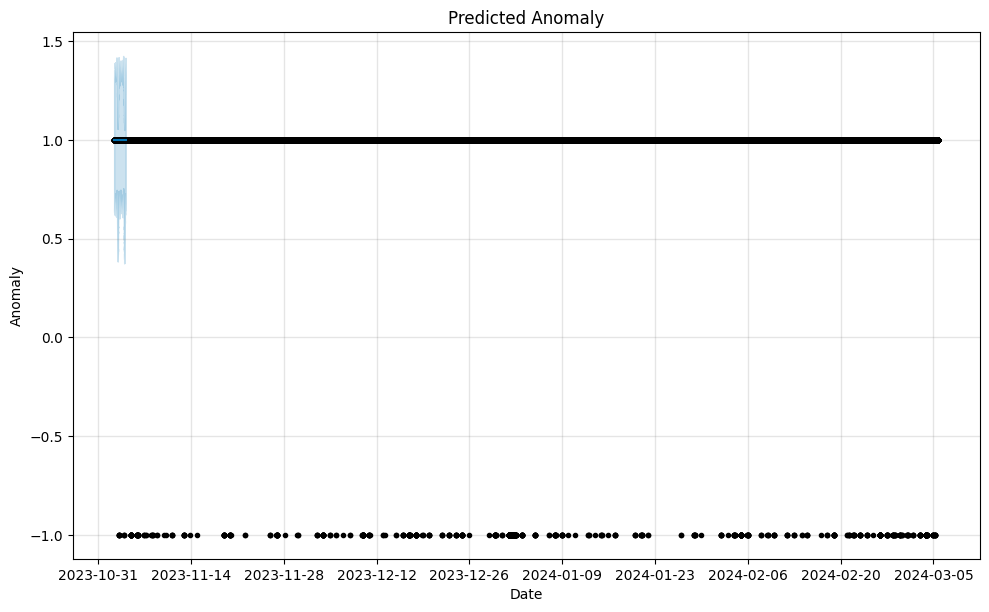

C:\Users\izma\anaconda3\envs\innova-case\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\izma\anaconda3\envs\innova-case\Lib\site-packages\prophet\plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
C:\Users\izma\anaconda3\envs\innova-case\Lib\site-packages\prophet\plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects inste

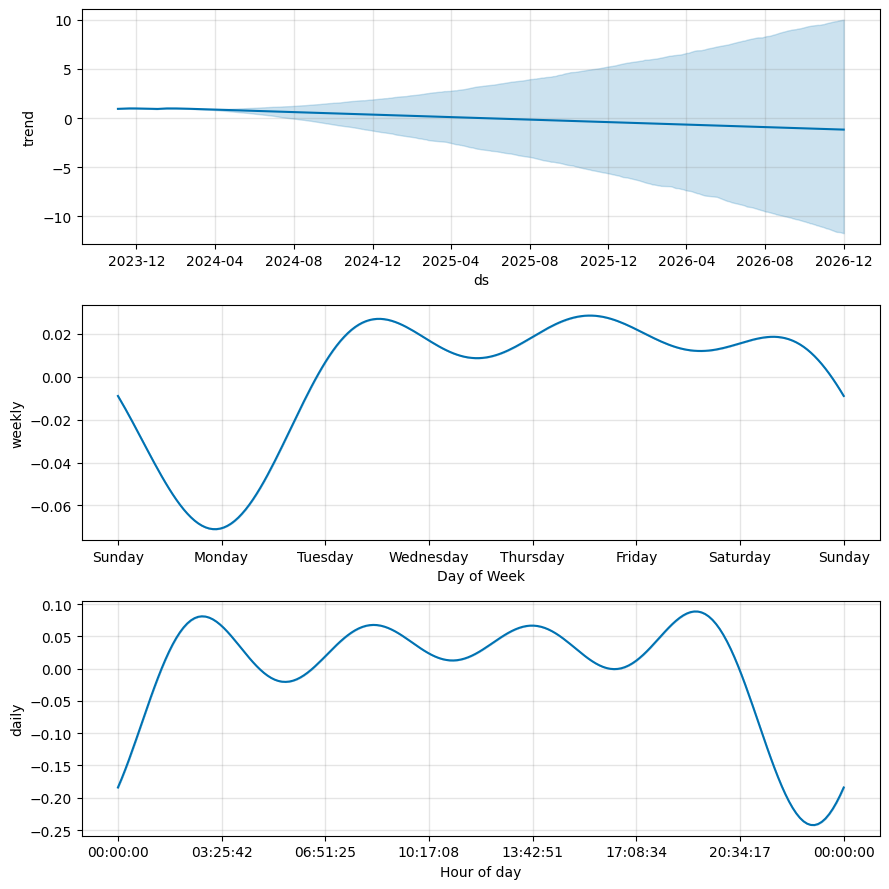

In [41]:

fig = model_anomaly.plot(forecast_anomaly.head(500))
plt.title('Predicted Anomaly')
plt.xlabel('Date')
plt.ylabel('Anomaly')
plt.show()

fig2 = model_anomaly.plot_components(forecast_anomaly.drop(['hourly'], axis=1))

#fig2 = model_anomaly.plot_components(forecast_anomaly.drop(['hourly'], axis=1))

plt.show()

In [42]:

forecast_info=forecast_anomaly[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
for_accuracy=forecast_info.iloc[:len(df_normalised['anomaly'])]
accuracy = accuracy_score(df_normalised['anomaly'], for_accuracy['yhat'])
print(accuracy)


0.9800163707697084


In [44]:
sample=for_accuracy[(for_accuracy['ds'] == "2024-03-05 18:25:00")]
print("tahmini,:",sample['yhat'])
sample1=df_normalised[(df_normalised['TIME_STAMP'] == "2024-03-05 18:25:00")]
print("gerçek:",sample1['anomaly'])


tahmini,: 35428    1
Name: yhat, dtype: int64
gerçek: 0    1
Name: anomaly, dtype: int32


In [45]:
from sklearn.metrics import mean_squared_error

forecast_traffic = model_traffic.predict(future_traffic)
for_traffic_error=forecast_traffic.iloc[:len(df_traffic['y'])]

df_traffic['mse'] = np.square(np.subtract(df_traffic['y'],for_traffic_error['yhat']))
mean_mse = df_traffic['mse'].mean()
print(mean_mse)

0.6327872318063011


In [46]:
df_traffic

,ds,y,mse
0,2024-03-05 18:25:00,0.458047,0.002580
1,2024-03-05 18:20:00,0.707533,0.035325
2,2024-03-05 18:15:00,0.932757,0.162114
3,2024-03-05 18:10:00,0.921366,0.145114
4,2024-03-05 18:05:00,0.913414,0.131727
...,...,...,...
35424,2023-11-02 10:30:00,0.485029,0.116901
35425,2023-11-02 10:25:00,0.478086,0.126166
35426,2023-11-02 10:20:00,0.475594,0.132580
35427,2023-11-02 10:15:00,0.473267,0.139100


In [47]:
forecast_anomaly['yhat'] = forecast_anomaly['yhat'].apply(lambda x: -1 if x < threshold else 1)

df_traffic['anomal'] = df_traffic['mse'].apply(lambda x: -1 if x > mean_mse else 1)
df_traffic

,ds,y,mse,anomal
0,2024-03-05 18:25:00,0.458047,0.002580,1
1,2024-03-05 18:20:00,0.707533,0.035325,1
2,2024-03-05 18:15:00,0.932757,0.162114,1
3,2024-03-05 18:10:00,0.921366,0.145114,1
4,2024-03-05 18:05:00,0.913414,0.131727,1
...,...,...,...,...
35424,2023-11-02 10:30:00,0.485029,0.116901,1
35425,2023-11-02 10:25:00,0.478086,0.126166,1
35426,2023-11-02 10:20:00,0.475594,0.132580,1
35427,2023-11-02 10:15:00,0.473267,0.139100,1


In [48]:
sample=df_traffic[(df_traffic['ds'] == "2024-03-05 18:25:00")]
sample

,ds,y,mse,anomal
0,2024-03-05 18:25:00,0.458047,0.00258,1
